In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [4]:
# wczytaj dane i odrzuć wiersze, w których występuje NaN (nie ma shot_made_flag)
data=pd.read_csv("../data/data.csv")
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.head())

(30697, 25)
(25697, 25)
         action_type combined_shot_type  game_event_id   game_id      lat  \
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   
5          Jump Shot          Jump Shot            244  20000012  34.0553   

   loc_x  loc_y       lon  minutes_remaining  period   ...          shot_type  \
1   -157      0 -118.4268                 10       1   ...     2PT Field Goal   
2   -101    135 -118.3708                  7       1   ...     2PT Field Goal   
3    138    175 -118.1318                  6       1   ...     2PT Field Goal   
4      0      0 -118.2698                  6       2   ...     2PT Field Goal   
5   -145    -11 -118.4148                  9       3   ...     2PT Field Goal   

          shot_zone_area  

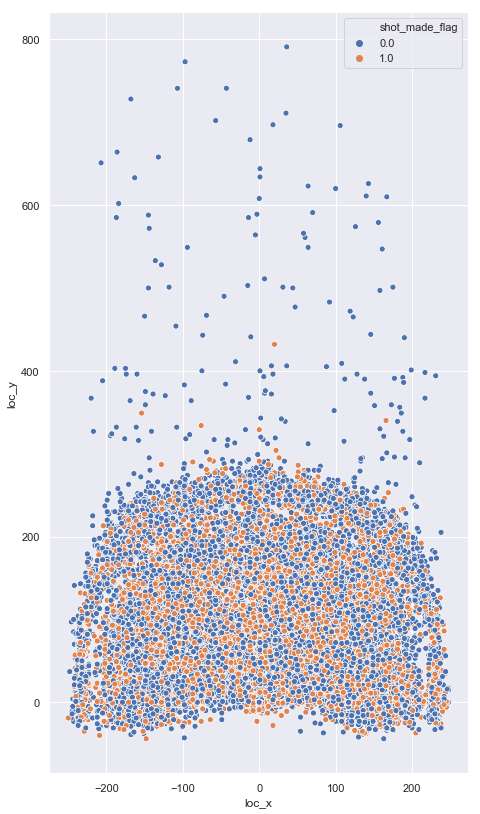

In [59]:
plt.figure(figsize=(7.5,14))
sns.scatterplot(x=data["loc_x"], y=data["loc_y"], hue=data["shot_made_flag"])
plt.show()

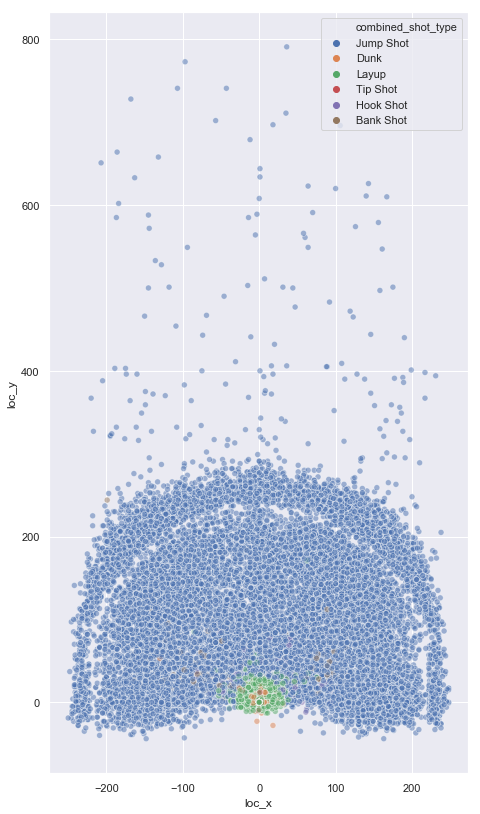

In [60]:
plt.figure(figsize=(7.5,14))
sns.scatterplot(x=data["loc_x"], y=data["loc_y"], hue=data["combined_shot_type"], alpha=0.5)
plt.show()

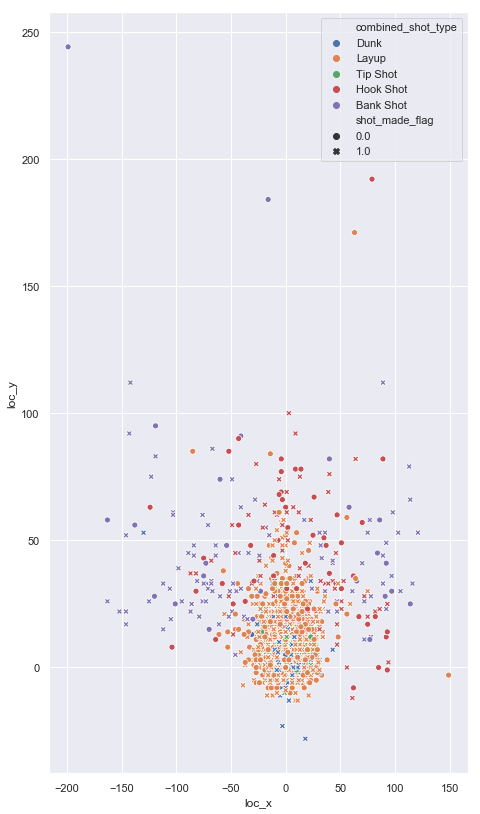

In [27]:
sns.scatterplot(x=data["loc_x"], y=data["loc_y"], hue=data.loc[data["combined_shot_type"]!="Jump Shot"]["combined_shot_type"], style=data["shot_made_flag"])
plt.show()

In [33]:
# zależność między częścią trafionych rzutów a rodzajem rzutu
print(data.groupby("combined_shot_type", as_index=False)['shot_made_flag'].mean().sort_values("shot_made_flag"))
print()
a=data.groupby("action_type", as_index=False)['shot_made_flag'].mean().sort_values("shot_made_flag")
b=data.groupby("action_type", as_index=False)['shot_made_flag'].count()
c=pd.concat([a,b["shot_made_flag"]], axis=1)
c.columns=["action_type", "shot_made_flag", "count"]
print(c.sort_values("shot_made_flag"))




  combined_shot_type  shot_made_flag
5           Tip Shot        0.348684
3          Jump Shot        0.391071
2          Hook Shot        0.535433
4              Layup        0.565093
0          Bank Shot        0.791667
1               Dunk        0.928030

                        action_type  shot_made_flag  count
45                 Running Tip Shot        0.000000      1
38         Running Finger Roll Shot        0.250000      4
25                        Jump Shot        0.326913  15836
8        Driving Floating Jump Shot        0.333333      3
49                         Tip Shot        0.350993    151
22                        Hook Shot        0.369863     73
26                       Layup Shot        0.385330   2154
10                Driving Jump shot        0.434783     23
18                 Finger Roll Shot        0.461538     26
48                   Tip Layup Shot        0.500000      2
31           Putback Slam Dunk Shot        0.500000      2
53             Turnaround Hook S

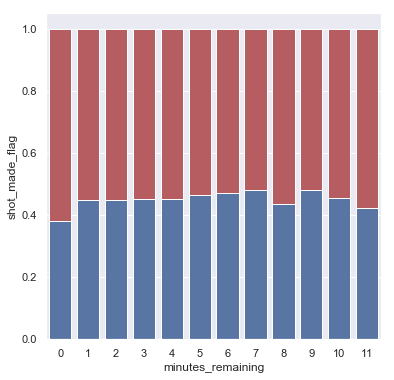

In [136]:
plt.figure(figsize=(6,6))
sns.barplot(x=data["minutes_remaining"], y=np.ones(len(data)), color='r', label='0')
grouped=data.groupby("minutes_remaining", as_index=False)['shot_made_flag'].mean()
sns.barplot(x=grouped["minutes_remaining"], y=grouped["shot_made_flag"], color='b', label='1')
plt.show()


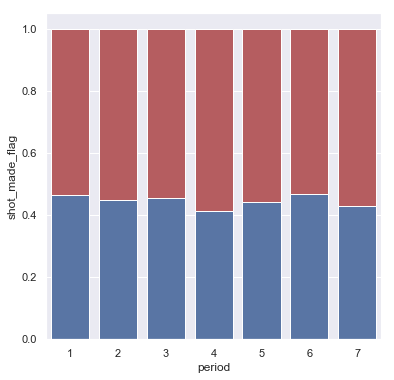

In [137]:
plt.figure(figsize=(6,6))
sns.barplot(x=data["period"], y=np.ones(len(data)), color='r', label='0')
grouped=data.groupby("period", as_index=False)['shot_made_flag'].mean()
sns.barplot(x=grouped["period"], y=grouped["shot_made_flag"], color='b', label='1')
plt.show()

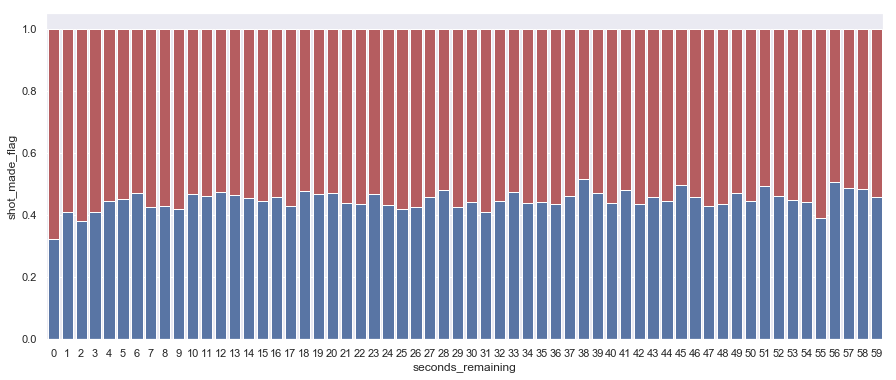

In [158]:
plt.figure(figsize=(15,6))
sns.barplot(x=data["seconds_remaining"], y=np.ones(len(data)), color='r', label='0')
grouped=data.groupby("seconds_remaining", as_index=False)['shot_made_flag'].mean()
sns.barplot(x=grouped["seconds_remaining"], y=grouped["shot_made_flag"], color='b', label='1')
plt.show()

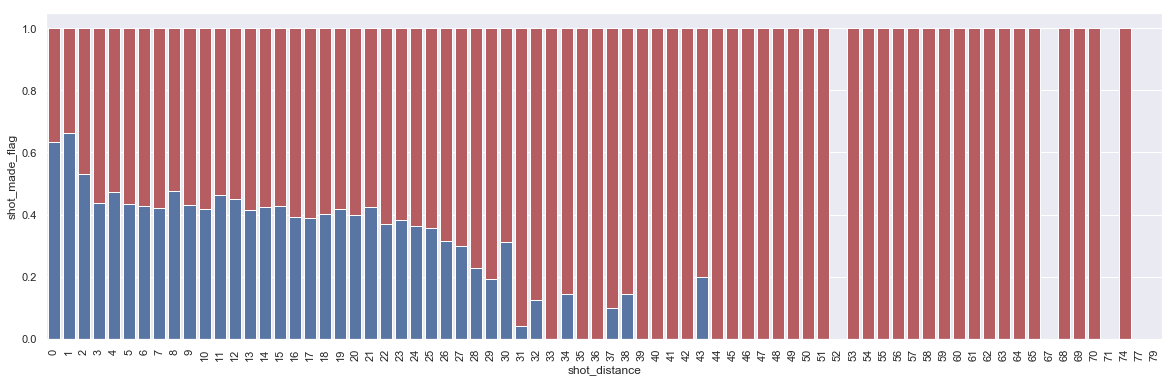

In [159]:
plt.figure(figsize=(20,6))
sns.barplot(x=data["shot_distance"], y=np.ones(len(data)), color='r', label='0')
grouped=data.groupby("shot_distance", as_index=False)['shot_made_flag'].mean()
sns.barplot(x=grouped["shot_distance"], y=grouped["shot_made_flag"], color='b', label='1')
plt.xticks(rotation=90)
plt.show()

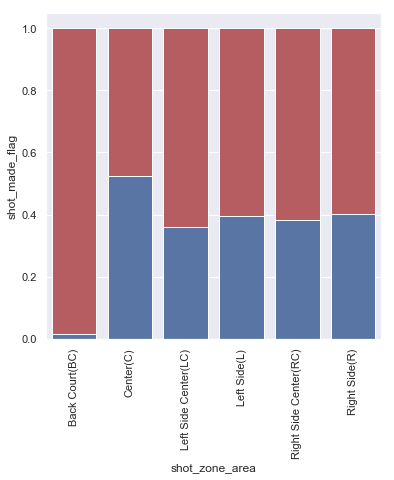

In [156]:
plt.figure(figsize=(6,6))
sns.barplot(x=data["shot_zone_area"], y=np.ones(len(data)), color='r', label='0')
grouped=data.groupby("shot_zone_area", as_index=False)['shot_made_flag'].mean()
sns.barplot(x=grouped["shot_zone_area"], y=grouped["shot_made_flag"], color='b', label='1')
plt.xticks(rotation=90)
plt.show()

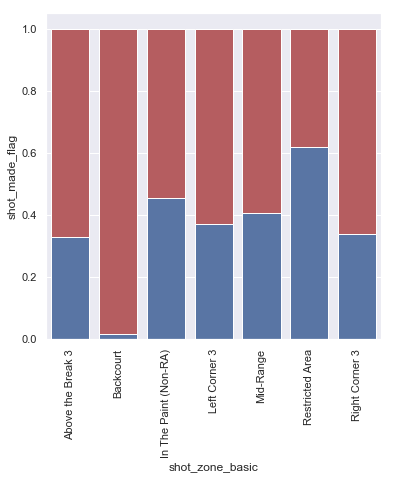

In [155]:
plt.figure(figsize=(6,6))
sns.barplot(x=data["shot_zone_basic"], y=np.ones(len(data)), color='r', label='0')
grouped=data.groupby("shot_zone_basic", as_index=False)['shot_made_flag'].mean()
sns.barplot(x=grouped["shot_zone_basic"], y=grouped["shot_made_flag"], color='b', label='1')
plt.xticks(rotation=90)
plt.show()

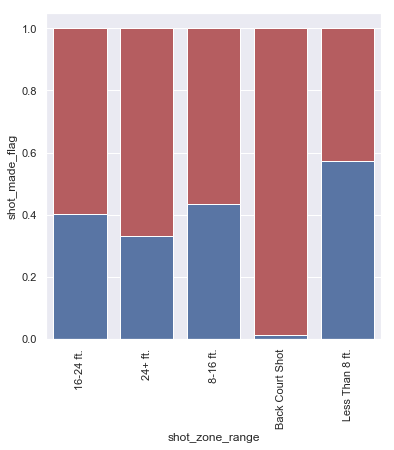

In [154]:
plt.figure(figsize=(6,6))
sns.barplot(x=data["shot_zone_range"], y=np.ones(len(data)), color='r', label='0')
grouped=data.groupby("shot_zone_range", as_index=False)['shot_made_flag'].mean()
sns.barplot(x=grouped["shot_zone_range"], y=grouped["shot_made_flag"], color='b', label='1')
plt.xticks(rotation=90)
plt.show()

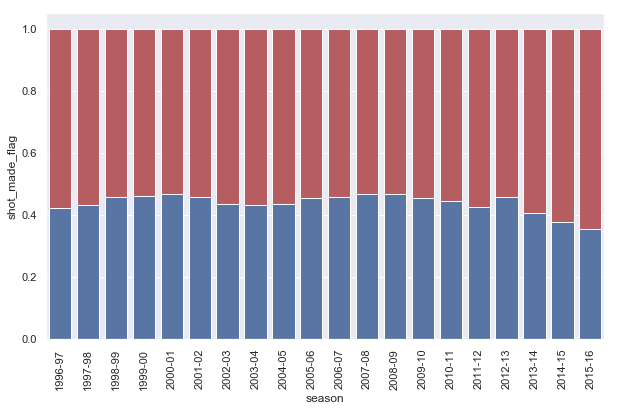

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(x=data["season"], y=np.ones(len(data)), color='r', label='0')
grouped=data.groupby("season", as_index=False)['shot_made_flag'].mean()
sns.barplot(x=grouped["season"], y=grouped["shot_made_flag"], color='b', label='1')
plt.xticks(rotation=90)
plt.show()